# Multilayer Perceptron Regression

## Objectives

* **Understand** the concept of Regression;
* **Learn and Explore** about the mathematical principles behind Regression Problems;
* **Create** a algorithm to for Regression Problems;
* **Observe** the performance of the algorithm trained.

## The Problem: Predict Values

<p style='text-align: justify;'> 
So far, we have used all the knowledge of artificial intelligence solely for classification problems. Based on one or more variables, it is possible to classify an item into class X, Y, or Z.

However, there are other types of problems that can be solved with the knowledge that artificial intelligence provides, such as regression problems. These are prediction problems characterized by situations where we need to forecast a value based on predefined variables, such as predicting wind speed based on air humidity or the value of a health insurance plan based on the beneficiary's age.
</p>  

## The Solution: Regression

<p style='text-align: justify;'> 
Regression is a powerful statistical technique employed to model the association between a dependent variable (Y) and one or more independent variables (X). The primary objective is to discern the optimal line that succinctly encapsulates this relationship, paving the way for reliable predictions or inferences.

Linear regression is primarily bifurcated into two types: simple and multiple linear regression. Simple linear regression deals with a single independent variable, whereas multiple linear regression accommodates two or more independent variables.

The essence of the linear regression function lies in the Mean Squared Error (MSE); it quantifies the discrepancy between the data points and the line generated by the model. The calculation of MSE involves extracting the predicted values from the regression model, subtracting the corresponding actual values, squaring these differences, summing them up, and finally dividing by the total number of data points. The resultant figure, the average squared difference, provides an indication of the model's proficiency in data fitting. Upon achieving a satisfactory fit, the linear regression model can then forecast Y values for new X values that were not part of the original dataset.

While powerful, the regression model may falter in efficiency if the relationship between the variables deviates from a strict proportionality, as is the case in a linear function. This limitation emanates from the method's simplistic nature and its dependence on a strictly linear correlation between the variables. But what if the relationship between our variables isn't linear? And what if we are dealing with more variables? Enter the Multilayer Perceptron (MLP). MLP brings to the table the capacity to predict values in more convoluted scenarios that aren't necessarily linear, thus expanding the realm of predictive modelling.
</p>  

## ☆ Challenger #1 (Linear): Orange Weight Prediction ☆

<p style='text-align: justify;'> 
Suppose you are studying the relationship between the weight of oranges and their diameter. You collected data from different oranges, measuring their weight in grams and diameter in centimeters. Now, you want to use linear regression to predict the weight of an orange based on its diameter.
</p>  

| Diameter (cm) | Weight (g) |
| :-:          | :-:      |
|     6        |    120   |
|     7        |    160   |
|     8        |    170   |
|     9        |    200   |
|    10        |    230   |
|    11        |    270   |
|    12        |    270   |
|    13        |    320   |
|    14        |    360   |


### ☆ Solution ☆ 

<p style='text-align: justify;'> 
First, given two arrays that describe the behavior of the variables, let's first plot the graph to better visualize the data.
</p>




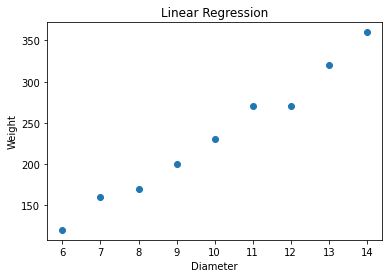

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
x_train = np.array([6, 7, 8, 9, 10, 11, 12, 13, 14])              # Diameter
y_train = np.array([120, 160, 170, 200, 230, 270, 270, 320, 360]) # Weight

# Scatter plot
plt.scatter(x_train, y_train)
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

<p style='text-align: justify;'> 

Observing the generated graph, it is noticeable that there is a linear behavior as the variables vary. To estimate the line that describes its behavior and predict the values of X, it is necessary to perform a linear regression.

</p>

In [2]:
# Function to calculate the regression line
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Regression Coeficients
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept 

def predict(x, slope, intercept):
    return slope * x + intercept

# Performs linear regression
slope, intercept = linear_regression(x_train, y_train)

# Makes a prediction for a new value

x_new = 5
y_new = predict(x_new, slope, intercept)

print(f"The prediction for x={x_new} is y={y_new}")

The prediction for x=5 is y=90.83333333333334


<p style='text-align: justify;'> 

Next, we can use the slope  and the intercept value of the linear function to plot the graph of the samples again, this time with the line that best describes their behavior.

</p>

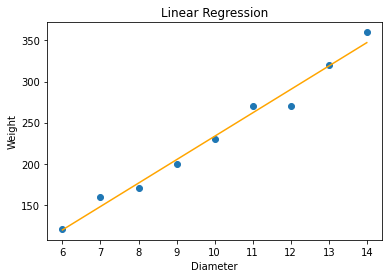

In [3]:
# Calculate linear regression line
regression_line = slope * x_train + intercept

# Scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_train, regression_line, color='orange')
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

##### Discussion: What happened?

- ``How did the algorithm predicted the X value?``
     
- ``Did the plotted line on the graph match the behavior of the points?``

- `` Would this solution be the same, if tha data does not have a linear pattern?``

## ☆ Challenger #2(Non Linear): Orange Weight Prediction ☆

<p style='text-align: justify;'> 
A farmer is interested in predicting the weight of oranges based on their characteristics. He has collected a dataset that includes the diameter, color, and texture of the peel of each orange, along with the corresponding weight. The goal is to develop a regression model using a perceptron to predict the weight of oranges based on these characteristics. The collected features are as follows:

- **Diameter**: the diameter of the orange in centimeters. </br>

- **Color**: a measure of the color of the orange on a scale from 0 to 1, where 0 represents green oranges and 1 represents ripe oranges.</br>

- **Texture**: a measure of the texture of the orange peel on a scale from 0 to 1, where 0 represents smooth peel and 1 represents rough peel.</br>

The weight of the oranges has been measured in grams and is the output variable that we want to predict. Your goal as a data scientist is to train a regression perceptron using the collected data to make accurate predictions of the weight of oranges based on the features of diameter, color, and texture. Here's the data colected:
</p>

| Diameter (cm) | Color | Texture | Weight (g) |
| :-:           | :-:   | :-:     | :-:      |
| 7.6           | 0.4   | 0.3     | 130      |
| 7.9           | 0.2   | 0.1     | 145      |
| 6.8           | 0.6   | 0.4     | 110      |
| 6.4           | 0.5   | 0.2     | 95       |
| 8.2           | 0.3   | 0.5     | 160      |
| 7.2           | 0.4   | 0.3     | 120      |
| 6.6           | 0.2   | 0.2     | 100      |
| 7.1           | 0.3   | 0.4     | 135      |
| 6.9           | 0.5   | 0.1     | 115      |
| 8.0           | 0.6   | 0.3     | 150      |


### ☆ Solution ☆ 

In [4]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, num_inputs, hidden_layers, num_outputs):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        self.weights = self._initialize_weights()

    def _initialize_weights(self):
        weights = []
        layer_sizes = [self.num_inputs] + self.hidden_layers + [self.num_outputs]

        for i in range(1, len(layer_sizes)):
            layer_weights = np.random.randn(layer_sizes[i], layer_sizes[i-1])
            weights.append(layer_weights)

        return weights

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _forward_pass(self, X):
        activations = [X]

        for i in range(len(self.weights)):
            current_activation = self._sigmoid(np.dot(activations[i], self.weights[i].T))
            activations.append(current_activation)

        return activations

    def _backward_pass(self, X, y, activations, learning_rate):
        num_examples = X.shape[0]
        delta = activations[-1] - y.reshape(-1, self.num_outputs)

        for i in range(len(self.weights)-1, -1, -1):
            weight_gradients = np.dot(delta.T, activations[i])
            self.weights[i] -= (learning_rate / num_examples) * weight_gradients

            delta = np.dot(delta, self.weights[i]) * (activations[i] * (1 - activations[i]))

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            activations = self._forward_pass(X)
            self._backward_pass(X, y, activations, learning_rate)

    def predict(self, X):
        activations = self._forward_pass(X)
        return activations[-1].flatten()

<p style='text-align: justify;'>
After build the Multilayer Perceptron, its time to input the data, and train the model, so we can aply in other cases:

</p>

In [6]:
# Training data
X = np.array([[7.6, 0.4, 0.3],
              [7.9, 0.2, 0.1],
              [6.8, 0.6, 0.4],
              [6.4, 0.5, 0.2],
              [8.2, 0.3, 0.5],
              [7.2, 0.4, 0.3],
              [6.6, 0.2, 0.2],
              [7.1, 0.3, 0.4],
              [6.9, 0.5, 0.1],
              [8.0, 0.6, 0.3]])

y = np.array([130, 145, 110, 95, 160, 120, 100, 135, 115, 150])

# Data normalization
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y_normalized = (y - np.mean(y)) / np.std(y)

# Create an instance of Multilayer Perceptron
mlp = MultilayerPerceptron(num_inputs=3, hidden_layers=[4, 4], num_outputs=1)

# Train the model
mlp.train(X_normalized, y_normalized, epochs=100, learning_rate=0.1)

# Test data
X_test = np.array([[7.8, 0.4, 0.2],
                   [6.7, 0.3, 0.3],
                   [7.0, 0.6, 0.5]])

# Normalize the test data
X_test_normalized = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)

# Make predictions for the test data
predictions_normalized = mlp.predict(X_test_normalized)

# Denormalize the output predictions
predictions = (predictions_normalized * np.std(y)) + np.mean(y)

print("Predictions:")
for i in range(len(X_test)):
    print("Orange {}: Predicted Weight: {:.2f}g".format(i+1, predictions[i]))

Predictions:
Orange 1: Predicted Weight: 126.76g
Orange 2: Predicted Weight: 126.76g
Orange 3: Predicted Weight: 127.44g


##### Discussion: What happened?

- ``How did the algorithm predicted the orange weights?``
     
- ``Would the last model we would be able to predict the values? Why?``

## Summary

<p style='text-align: justify;'>
In this notebook, we learned the concept of regression in an approach to a new problem: predicting values based on a pattern. We also applied all the concepts in practice, in two simple data analysis problem.  Despite its limitations, the linear regression model is highly effective in predicting values for proportional systems. To surpass linear regression model, we can use MultiLayer Perceptron to predict values in non linear models with a large number of variables precisely.</br>
</p>

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

Congratulations, you have completed second part the learning objectives of the course! As a final exercise, successfully complete an applied problem in the assessment in [_04-multilayer-perceptron-assessment.ipynb_](04-multilayer-perceptron-assessment.ipynb)